In [10]:
import pandas as pd
import numpy as np
import os
import cv2


# Read train.csv into a DataFrame
train_df = pd.read_csv('asl-signs/train.csv')
train_df['sequence_id'] = train_df['sequence_id'].astype(str)  # Ensure sequence_id is a string

# Count of each sign
sign_counts = train_df['sign'].value_counts()

# Initialize a list to store sequence_ids from parquet files
parquet_sequence_ids = []

# Loop through the training data to collect sequence_ids
for root, dirs, files in os.walk("asl-signs/train_landmark_files"):
    for file in files:
        if file.endswith(".parquet"):
            sequence_id = os.path.splitext(file)[0]
            parquet_sequence_ids.append(sequence_id)

# Convert to a set for faster lookup
parquet_sequence_ids = set(parquet_sequence_ids)

# Find mismatched sequence_ids
mismatched_ids = parquet_sequence_ids.difference(set(train_df['sequence_id']))
mismatch_count = len(mismatched_ids)

# Count of each participant
participant_counts = train_df['participant_id'].value_counts()

# Create a DataFrame for statistics
stats_df = pd.DataFrame({
    'Statistic': ['Total Signs', 'Mismatched Sequence IDs', 'Total Participants'],
    'Count': [len(sign_counts), mismatch_count, len(participant_counts)]
})

# Create a DataFrame for sign counts
sign_df = pd.DataFrame({'Sign': sign_counts.index, 'Count': sign_counts.values})

# Create a DataFrame for participant counts
participant_df = pd.DataFrame({'Participant ID': participant_counts.index, 'Count': participant_counts.values})


In [11]:
stats_df

,Statistic,Count
0,Total Signs,250
1,Mismatched Sequence IDs,0
2,Total Participants,21


In [12]:
sign_df

,Sign,Count
0,listen,415
1,look,414
2,shhh,411
3,donkey,410
4,mouse,408
...,...,...
245,dance,312
246,person,312
247,beside,310
248,vacuum,307


In [13]:
participant_df

,Participant ID,Count
0,49445,4968
1,61333,4900
2,36257,4896
3,16069,4848
4,26734,4841
5,55372,4826
6,2044,4810
7,37779,4782
8,32319,4753
9,29302,4722


In [14]:

# Most populated word
most_populated_word = sign_counts.idxmax()
most_populated_word_count = sign_counts.max()

# User with most videos
most_active_user = participant_counts.idxmax()
most_active_user_count = participant_counts.max()

# Average videos per word
avg_videos_per_word = sign_counts.mean()

# Average videos per user
avg_videos_per_user = participant_counts.mean()

# Least populated word
least_populated_word = sign_counts.idxmin()
least_populated_word_count = sign_counts.min()

# User with least videos
least_active_user = participant_counts.idxmin()
least_active_user_count = participant_counts.min()

# Standard deviation for videos per word
std_dev_videos_per_word = sign_counts.std()

# Standard deviation for videos per user
std_dev_videos_per_user = participant_counts.std()

# Total number of videos
total_videos = train_df.shape[0]

# Total number of unique words
total_unique_words = len(sign_counts)

# Total number of unique users
total_unique_users = len(participant_counts)


# Combine all statistics into one DataFrame
all_stats_df = pd.DataFrame({
    'Statistic': [
        'Total Signs', 
        'Mismatched Sequence IDs', 
        'Total Participants',
        'Most Populated Word', 
        'Count of Most Populated Word', 
        'User with Most Videos', 
        'Count of Videos from Most Active User',
        'Average Videos per Word',
        'Average Videos per User',
        'Least Populated Word',
        'Count of Least Populated Word',
        'User with Least Videos',
        'Count of Videos from Least Active User',
        'Standard Deviation for Videos per Word',
        'Standard Deviation for Videos per User',
        'Total Number of Videos',
        'Total Number of Unique Words',
        'Total Number of Unique Users'
    ],
    'Value': [
        len(sign_counts), 
        mismatch_count, 
        len(participant_counts),
        most_populated_word, 
        most_populated_word_count, 
        most_active_user, 
        most_active_user_count,
        avg_videos_per_word,
        avg_videos_per_user,
        least_populated_word,
        least_populated_word_count,
        least_active_user,
        least_active_user_count,
        std_dev_videos_per_word,
        std_dev_videos_per_user,
        total_videos,
        total_unique_words,
        total_unique_users
    ]
})

print("All Statistics Combined:")
print(all_stats_df)


All Statistics Combined:
                                 Statistic        Value
0                              Total Signs          250
1                  Mismatched Sequence IDs            0
2                       Total Participants           21
3                      Most Populated Word       listen
4             Count of Most Populated Word          415
5                    User with Most Videos        49445
6    Count of Videos from Most Active User         4968
7                  Average Videos per Word      377.908
8                  Average Videos per User  4498.904762
9                     Least Populated Word       zipper
10           Count of Least Populated Word          299
11                  User with Least Videos        30680
12  Count of Videos from Least Active User         3338
13  Standard Deviation for Videos per Word    19.395367
14  Standard Deviation for Videos per User   502.892822
15                  Total Number of Videos        94477
16            Total Num

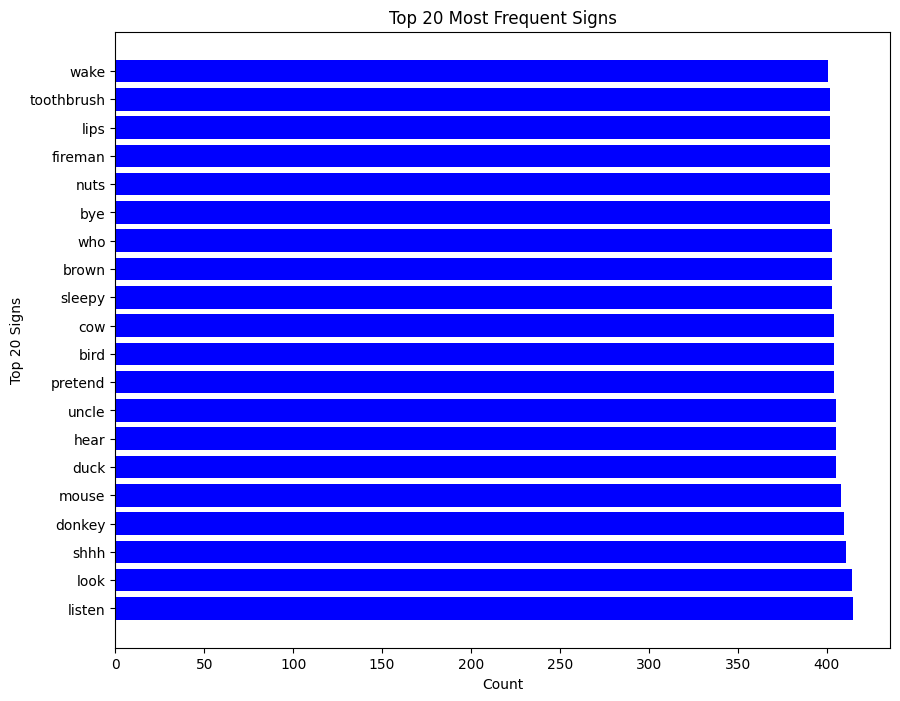

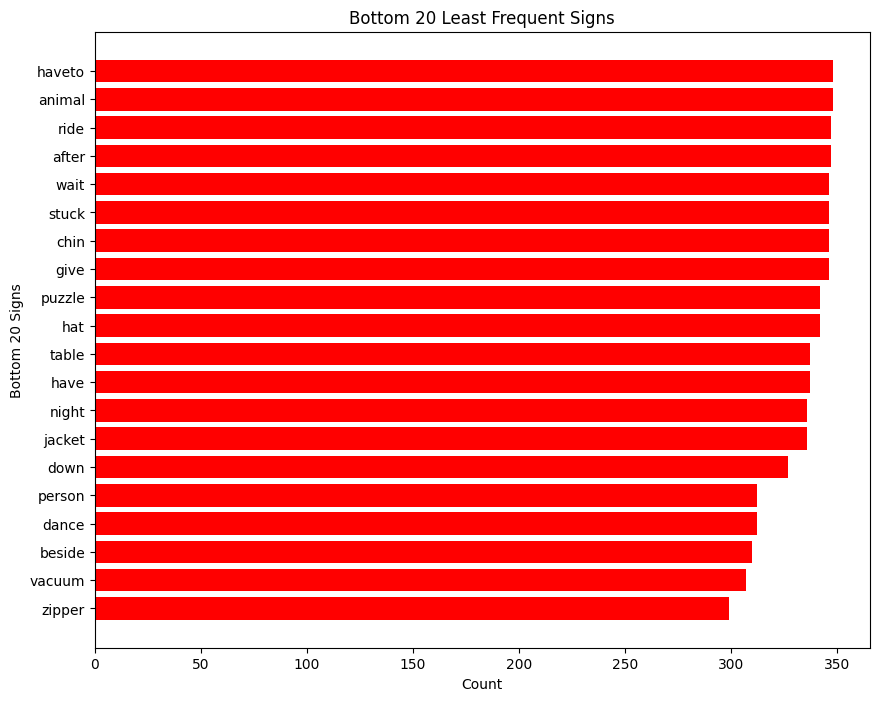

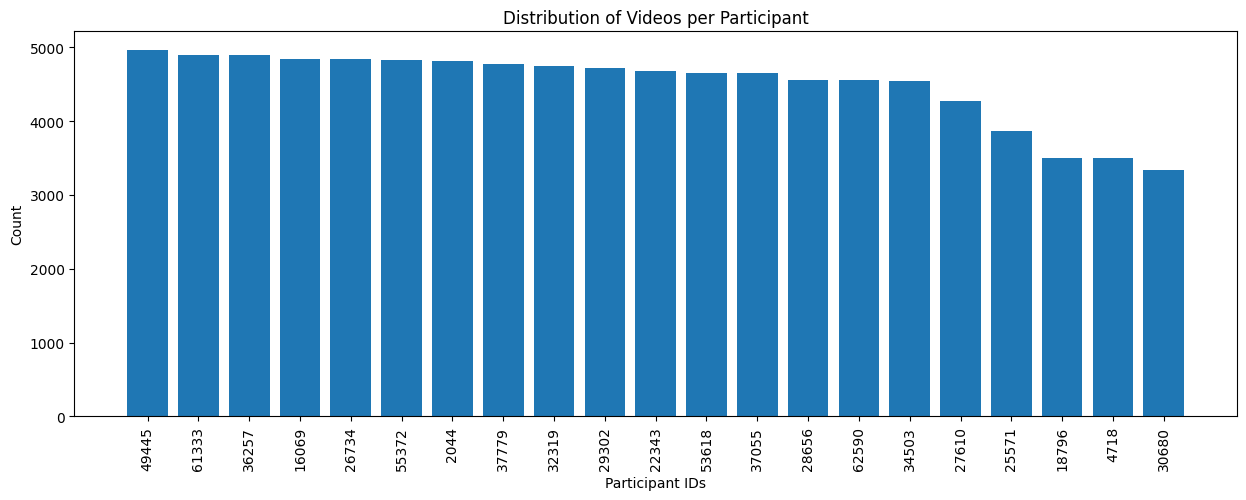

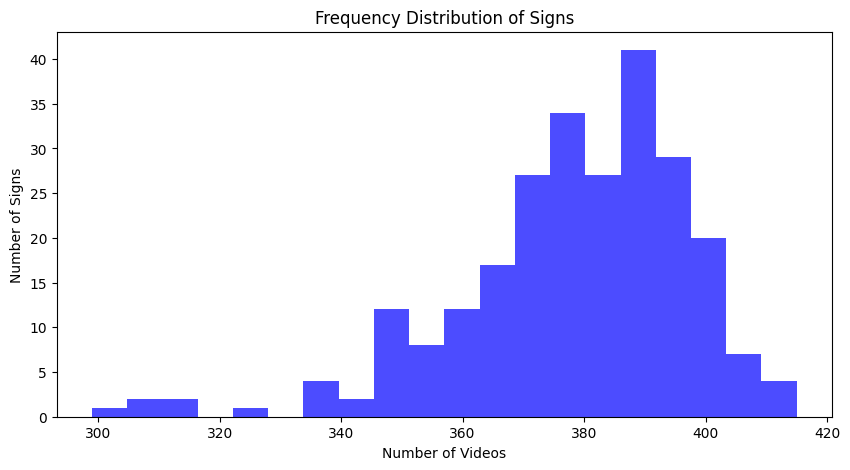

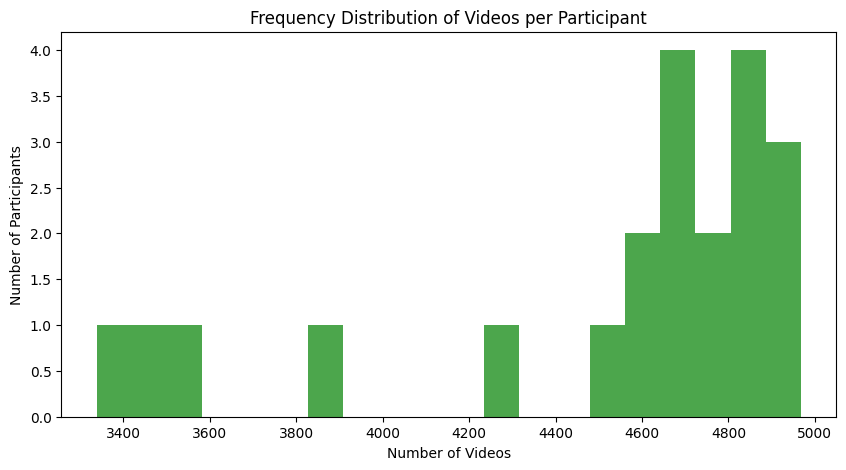

In [19]:
import matplotlib.pyplot as plt

# Bar Chart for Sign Counts
# Top 20 Signs
plt.figure(figsize=(10, 8))
top_signs = sign_counts.nlargest(20)
plt.barh(top_signs.index, top_signs.values, color='blue')
plt.xlabel('Count')
plt.ylabel('Top 20 Signs')
plt.title('Top 20 Most Frequent Signs')
plt.show()

# Bottom 20 Signs
plt.figure(figsize=(10, 8))
bottom_signs = sign_counts.nsmallest(20)
plt.barh(bottom_signs.index, bottom_signs.values, color='red')
plt.xlabel('Count')
plt.ylabel('Bottom 20 Signs')
plt.title('Bottom 20 Least Frequent Signs')
plt.show()


# Bar Chart for Participant Counts
plt.figure(figsize=(15, 5))
plt.bar(participant_counts.index.astype(str), participant_counts.values)
plt.xlabel('Participant IDs')
plt.ylabel('Count')
plt.title('Distribution of Videos per Participant')
plt.xticks(rotation=90)
plt.show()

# Histogram for Sign Counts
plt.figure(figsize=(10, 5))
plt.hist(sign_counts.values, bins=20, alpha=0.7, color='blue')
plt.xlabel('Number of Videos')
plt.ylabel('Number of Signs')
plt.title('Frequency Distribution of Signs')
plt.show()

# Histogram for Participant Counts
plt.figure(figsize=(10, 5))
plt.hist(participant_counts.values, bins=20, alpha=0.7, color='green')
plt.xlabel('Number of Videos')
plt.ylabel('Number of Participants')
plt.title('Frequency Distribution of Videos per Participant')
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Skewness and Kurtosis
sign_skewness = skew(train_df['sign'].value_counts())
sign_kurtosis = kurtosis(train_df['sign'].value_counts())
print(f"Skewness of Sign Distribution: {sign_skewness}")
print(f"Kurtosis of Sign Distribution: {sign_kurtosis}")


# Class Imbalance
imbalance_ratio = train_df['sign'].value_counts() / len(train_df)
print(f"Class Imbalance Ratio:\n{imbalance_ratio}")



Skewness of Sign Distribution: -1.1487993857390844
Kurtosis of Sign Distribution: 2.055772843429076
Class Imbalance Ratio:
listen    0.004393
look      0.004382
shhh      0.004350
donkey    0.004340
mouse     0.004319
            ...   
dance     0.003302
person    0.003302
beside    0.003281
vacuum    0.003249
zipper    0.003165
Name: sign, Length: 250, dtype: float64
